# Text Data mining with Python

Refer: https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

## Table of Contents:
1. Basic feature extraction using text data
    * Number of words
    * Number of characters
    * Average word length
    * Number of stopwords
    * Number of special characters
    * Number of numerics
    * Number of uppercase words
2. Basic Text Pre-processing of text data
    * Lower casing
    * Punctuation removal
    * Stopwords removal
    * Frequent words removal
    * Rare words removal
    * Spelling correction
    * Tokenization
    * Stemming
    * Lemmatization
3. Advance Text Processing
    * N-grams
    * Term Frequency
    * Inverse Document Frequency
    * Term Frequency-Inverse Document Frequency (TF-IDF)
    * Bag of Words
    * Sentiment Analysis
    * Word Embedding

### 1. Basic Feature Extraction

Before starting, let’s quickly read the training file from the dataset in order to perform different tasks on it.
we will use the twitter sentiment [dataset](https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/ "Download dataset from here") from the datahack platform.

In [5]:
import pandas as pd
train = pd.read_csv('train_E6oV3lV.csv')

Note that here we are only working with textual data, but we can also use the below methods when numerical features are also present along with the text.

#### 1.1 Number of Words
One of the most basic features we can extract is the number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

To do this, we simply use the __split__ function in python:

In [6]:
train.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
train['word_count'] = train['tweet'].apply(lambda x: len(str(x).split(" ")))
train[['tweet','word_count']].head()

,tweet,word_count
0,@user when a father is dysfunctional and is s...,21
1,@user @user thanks for #lyft credit i can't us...,22
2,bihday your majesty,5
3,#model i love u take with u all the time in ...,17
4,factsguide: society now #motivation,8


In [8]:
train.head()

,id,label,tweet,word_count
0,1,0,@user when a father is dysfunctional and is s...,21
1,2,0,@user @user thanks for #lyft credit i can't us...,22
2,3,0,bihday your majesty,5
3,4,0,#model i love u take with u all the time in ...,17
4,5,0,factsguide: society now #motivation,8


#### 1.2 Number of characters
This feature is also based on the previous feature intuition. Here, we calculate the number of characters in each tweet. This is done by calculating the length of the tweet.

In [9]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train[['tweet','char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39


In [28]:
# to find the number of characters excluding the spaces
def tweet_length_woWS(tweet):
    return tweet.str.len() - tweet.str.count(' ')

train['char_count_woWS'] = tweet_length_woWS(train['tweet'])
train[['tweet', 'char_count', 'char_count_woWS']].head()

,tweet,char_count,char_count_woWS
0,@user when a father is dysfunctional and is s...,102,82
1,@user @user thanks for #lyft credit i can't us...,122,101
2,bihday your majesty,21,17
3,#model i love u take with u all the time in ...,86,70
4,factsguide: society now #motivation,39,32


In [29]:
type(train)

pandas.core.frame.DataFrame

In [30]:
# to find the number of characters excluding the spaces
# this code is alternative to the above cell where length is calculated by substraction method
def tweet_length_WS(tweet):
    return len(tweet.replace(" ", ""))

train['char_count_WS'] = train['tweet'].apply(lambda x: tweet_length_WS(x))
train[['tweet', 'char_count', 'char_count_woWS', 'char_count_WS']].head()

,tweet,char_count,char_count_woWS,char_count_WS
0,@user when a father is dysfunctional and is s...,102,82,82
1,@user @user thanks for #lyft credit i can't us...,122,101,101
2,bihday your majesty,21,17,17
3,#model i love u take with u all the time in ...,86,70,70
4,factsguide: society now #motivation,39,32,32


In [31]:
# code for dropping the column 'char_count_WS' from the pandas dataframe

train.drop(['char_count_WS'], axis=1)

,id,label,tweet,word_count,char_count,char_count_woWS
0,1,0,@user when a father is dysfunctional and is s...,21,102,82
1,2,0,@user @user thanks for #lyft credit i can't us...,22,122,101
2,3,0,bihday your majesty,5,21,17
3,4,0,#model i love u take with u all the time in ...,17,86,70
4,5,0,factsguide: society now #motivation,8,39,32
5,6,0,[2/2] huge fan fare and big talking before the...,21,116,96
6,7,0,@user camping tomorrow @user @user @user @use...,12,74,63
7,8,0,the next school year is the year for exams.ð...,23,143,121
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,13,87,75
9,10,0,@user @user welcome here ! i'm it's so #gr...,15,50,36


#### 1.3 Average Word Length
We will also extract another feature which will calculate the average word length of each tweet. This can also potentially help us in improving our model.

Here, we simply take the sum of the length of all the words and divide it by the total length of the tweet:

In [32]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

train['avg_word'] = train['tweet'].apply(lambda x: avg_word(x))
train[['tweet','avg_word']].head()

,tweet,avg_word
0,@user when a father is dysfunctional and is s...,4.555556
1,@user @user thanks for #lyft credit i can't us...,5.315789
2,bihday your majesty,5.666667
3,#model i love u take with u all the time in ...,4.928571
4,factsguide: society now #motivation,8.000000


#### 1.4 Number of stopwords
Generally, while solving an NLP problem, the first thing we do is to remove the stopwords. But sometimes calculating the number of stopwords can also give us some extra information which we might have been losing before.

Here, we have imported stopwords from NLTK, which is a basic NLP library in python.

# Don't run it. Already executed
import nltk

nltk.download('stopwords')

In [37]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

train['stopwords'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['tweet','stopwords']].head()

,tweet,stopwords
0,@user when a father is dysfunctional and is s...,10
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,1
3,#model i love u take with u all the time in ...,5
4,factsguide: society now #motivation,1


#### 1.5 Number of special characters
One more interesting feature which we can extract from a tweet is calculating the number of hashtags or mentions present in it. This also helps in extracting extra information from our text data.

Here, we make use of the ‘starts with’ function because hashtags (or mentions) always appear at the beginning of a word.

In [38]:
train['hastags'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['tweet','hastags']].head()

,tweet,hastags
0,@user when a father is dysfunctional and is s...,1
1,@user @user thanks for #lyft credit i can't us...,3
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,1
4,factsguide: society now #motivation,1


#### 1.6 Number of numerics
Just like we calculated the number of words, we can also calculate the number of numerics which are present in the tweets. It does not have a lot of use in our example, but this is still a useful feature that should be run while doing similar exercises. For example, 

In [39]:
train['numerics'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['tweet','numerics']].head()

,tweet,numerics
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


#### 1.7 Number of Uppercase words
Anger or rage is quite often expressed by writing in UPPERCASE words which makes this a necessary operation to identify those words.

In [40]:
train['upper'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['tweet','upper']].head()

,tweet,upper
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


### 2. Basic Pre-processing
So far, we have learned how to extract basic features from text data. Before diving into text and feature extraction, our first step should be cleaning the data in order to obtain better features. We will achieve this by doing some of the basic pre-processing steps on our training data.

#### 2.1 Lower case
The first pre-processing step which we will do is transform our tweets into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [41]:
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['tweet'].head()

0    @user when a father is dysfunctional and is so...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model i love u take with u all the time in ur...
4                  factsguide: society now #motivation
Name: tweet, dtype: object

#### 2.2 Removing Punctuation
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [42]:
train['tweet'] = train['tweet'].str.replace('[^\w\s]','')
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in urð...
4                    factsguide society now motivation
Name: tweet, dtype: object

As you can see in the above output, all the punctuation, including ‘#’ and ‘@’, has been removed from the training data.

 

#### 2.3 Removal of Stop Words
As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

In [43]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                model love u take u time urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

#### 2.4 Common word removal
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [50]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:10]
freq

life        1086
like        1042
today        991
new          983
positive     928
thankful     919
get          917
people       852
good         840
bihday       825
dtype: int64

Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [46]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

#### 2.5 Rare words removal
Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts



In [54]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-10:]
freq

âpinkãpinkâ            1
laconza_williams_sr    1
drew                   1
bestabiamo             1
peâ                    1
630am                  1
tashaneishqâ           1
topeka                 1
luckiest               1
untukâ                 1
dtype: int64

In [55]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

All these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective.

 

#### 2.6 Spelling correction
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous [article](https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/ "NLP with textblob") on ‘NLP for beginners using textblob’.

In [59]:
from textblob import TextBlob
train['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    father dysfunctional selfish drags kiss dysfun...
1    thanks left credit can use cause dont offer wh...
2                                       midday majesty
3                               model take or ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

Note that it will actually take a lot of time to make these corrections. Therefore, just for the purposes of learning, I have shown this technique by applying it on only the first 5 rows. Moreover, we cannot always expect it to be accurate so some care should be taken before applying it.

We should also keep in mind that words are often used in their abbreviated form. For instance, ‘your’ is used as ‘ur’. We should treat this before the spelling correction step, otherwise these words might be transformed into any other word like the one shown below:



 

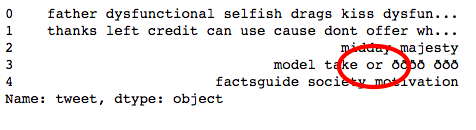

#### 2.7 Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.




**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt/PY3/english.pickle

  Searched in:
    - '/home/hduser1/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [62]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/hduser1/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [67]:
TextBlob(train['tweet'][1]).words

WordList(['thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked'])

#### 2.8 Stemming
Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.



In [68]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit cant use caus dont offer whe...
2                                       bihday majesti
3                              model take urð ðððð ððð
4                              factsguid societi motiv
Name: tweet, dtype: object

In the above output, dysfunctional has been transformed into dysfunct, among other changes.

 

#### 2.9 Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [ ]:
**********************************************************************
  Resource wordnet not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('wordnet')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/wordnet

  Searched in:
    - '/home/hduser1/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

In [70]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/hduser1/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [71]:
from textblob import Word
train['tweet'] = train['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['tweet'].head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

### 3. Advance Text Processing
Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

 

#### 3.1 N-grams
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

So, let’s quickly extract bigrams from our tweets using the ngrams function of the textblob library.

In [72]:
TextBlob(train['tweet'][0]).ngrams(2)

[WordList(['father', 'dysfunctional']),
 WordList(['dysfunctional', 'selfish']),
 WordList(['selfish', 'drag']),
 WordList(['drag', 'kid']),
 WordList(['kid', 'dysfunction']),
 WordList(['dysfunction', 'run'])]

#### 3.2 Term frequency
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

To understand more about Term Frequency, have a look at [this article](https://www.analyticsvidhya.com/blog/2015/04/information-retrieval-system-explained/).

Below, I have tried to show you the term frequency table of a tweet.

In [73]:
tf1 = (train['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,offer,1
1,wheelchair,1
2,disapointed,1
3,cause,1
4,dont,1
5,getthanked,1
6,credit,1
7,van,1
8,pdx,1
9,thanks,1


You can read more about term frequency in this [article](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/).

#### 3.3 Inverse Document Frequency
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

So, let’s calculate IDF for the same tweets for which we calculated the term frequency.



In [75]:
import numpy as np
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['tweet'].str.contains(word)])))

tf1

,words,tf,idf
0,offer,1,6.522155
1,wheelchair,1,9.273691
2,disapointed,1,10.372303
3,cause,1,5.690172
4,dont,1,3.745585
5,getthanked,1,9.679156
6,credit,1,7.327781
7,van,1,5.236505
8,pdx,1,8.762865
9,thanks,1,4.597751


The more the value of IDF, the more unique is the word.

 

#### 3.4 Term Frequency – Inverse Document Frequency (TF-IDF)
TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [76]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,offer,1,6.522155,6.522155
1,wheelchair,1,9.273691,9.273691
2,disapointed,1,10.372303,10.372303
3,cause,1,5.690172,5.690172
4,dont,1,3.745585,3.745585
5,getthanked,1,9.679156,9.679156
6,credit,1,7.327781,7.327781
7,van,1,5.236505,5.236505
8,pdx,1,8.762865,8.762865
9,thanks,1,4.597751,4.597751


We can see that the TF-IDF has penalized words like ‘don’t’, ‘can’t’, and ‘use’ because they are commonly occurring words. However, it has given a high weight to “disappointed” since that will be very useful in determining the sentiment of the tweet.

We don’t have to calculate TF and IDF every time beforehand and then multiply it to obtain TF-IDF. Instead, sklearn has a separate function to directly obtain it:

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['tweet'])

train_vect

<31962x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 114048 stored elements in Compressed Sparse Row format>

We can also perform basic pre-processing steps like lower-casing and removal of stopwords, if we haven’t done them earlier.

 

#### 3.5 Bag of Words
Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

For implementation, sklearn provides a separate function for it as shown below:

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['tweet'])
train_bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 128385 stored elements in Compressed Sparse Row format>

To gain a better understanding of this, you can refer to this [article](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/).

 

#### 3.6 Sentiment Analysis
If you recall, our problem was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library), let’s check the sentiment of the first few tweets.

In [79]:
train['tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0    (-0.3, 0.5354166666666667)
1                    (0.2, 0.2)
2                    (0.0, 0.0)
3                    (0.0, 0.0)
4                    (0.0, 0.0)
Name: tweet, dtype: object

Above, you can see that it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [80]:
train['sentiment'] = train['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
train[['tweet','sentiment']].head()

,tweet,sentiment
0,father dysfunctional selfish drag kid dysfunct...,-0.3
1,thanks lyft credit cant use cause dont offer w...,0.2
2,bihday majesty,0.0
3,model take urð ðððð ððð,0.0
4,factsguide society motivation,0.0


#### 3.7 Word Embeddings
Word Embedding is the representation of text in the form of vectors. The underlying idea here is that similar words will have a minimum distance between their vectors.

Word2Vec models require a lot of text, so either we can train it on our training data or we can use the pre-trained word vectors developed by Google, Wiki, etc.

Here, we will use pre-trained word vectors which can be downloaded from the [glove](https://nlp.stanford.edu/projects/glove/) website. There are different dimensions (50,100, 200, 300) vectors trained on wiki data. For this example, I have downloaded the 100-dimensional version of the model.

You can refer an article [here](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/) to understand different form of word embeddings.

The first step here is to convert it into the word2vec format.

In [83]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

Now, we can load the above word2vec file as a model.

In [84]:
from gensim.models import KeyedVectors # load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

Let’s say our tweet contains a text saying ‘go away’. We can easily obtain it’s word vector using the above model:

In [85]:
model['go']

array([-0.078894  ,  0.46160001,  0.57779002, -0.71636999, -0.13121   ,
        0.41859999, -0.29155999,  0.52006   ,  0.089986  , -0.35062   ,
        0.51754999,  0.51998001,  0.15218   ,  0.41485   , -0.12377   ,
       -0.37222001,  0.0273    ,  0.75673002, -0.8739    ,  0.58934999,
        0.46662   ,  0.62918001,  0.092603  , -0.012868  , -0.015169  ,
        0.25567001, -0.43024999, -0.77667999,  0.71449   , -0.38339999,
       -0.69638002,  0.23522   ,  0.11396   ,  0.02778   ,  0.071357  ,
        0.87409002, -0.12809999,  0.063576  ,  0.067867  , -0.50181001,
       -0.28523001, -0.072536  , -0.50738001, -0.69139999, -0.53579003,
       -0.11361   , -0.38234001, -0.12414   ,  0.011214  , -1.16219997,
        0.037057  , -0.18494999,  0.01416   ,  0.87193   , -0.097309  ,
       -2.35649991, -0.14554   ,  0.28275001,  2.00530005,  0.23439001,
       -0.38297999,  0.69538999, -0.44916001, -0.094157  ,  0.90526998,
        0.65763998,  0.27627999,  0.30688   , -0.57780999, -0.22

In [86]:
model['away']

array([-0.10379   , -0.014792  ,  0.59933001, -0.51315999, -0.036463  ,
        0.65880001, -0.57906002,  0.17818999,  0.23662999, -0.21383999,
        0.55339003,  0.53596997,  0.041444  ,  0.16095001,  0.017093  ,
       -0.37242001,  0.017974  ,  0.39267999, -0.23265   ,  0.18179999,
        0.66404998,  0.98163003,  0.42339   ,  0.030581  ,  0.35014999,
        0.25519001, -0.71182001, -0.42184001,  0.13067999, -0.47452   ,
       -0.08175   ,  0.1574    , -0.13262001,  0.22679   , -0.16885   ,
       -0.11122   , -0.32271999, -0.020978  , -0.43345001,  0.17200001,
       -0.67365998, -0.79052001,  0.10556   , -0.4219    , -0.12385   ,
       -0.063486  , -0.17843001,  0.56358999,  0.16986001, -0.17804   ,
        0.13956   , -0.20169   ,  0.078985  ,  1.4497    ,  0.23556   ,
       -2.6013999 , -0.52859998, -0.11636   ,  1.7184    ,  0.33254001,
        0.12136   ,  1.1602    , -0.29139999,  0.47125   ,  0.41869   ,
        0.35271001,  0.47869   , -0.042281  , -0.18294001,  0.17

We then take the average to represent the string ‘go away’ in the form of vectors having 100 dimensions.

In [87]:
(model['go'] + model['away'])/2

array([-0.091342  ,  0.22340401,  0.58855999, -0.61476499, -0.0838365 ,
        0.53869998, -0.43531001,  0.349125  ,  0.16330799, -0.28222999,
        0.53547001,  0.52797496,  0.096812  ,  0.2879    , -0.0533385 ,
       -0.37232   ,  0.022637  ,  0.574705  , -0.55327499,  0.385575  ,
        0.56533498,  0.80540502,  0.2579965 ,  0.0088565 ,  0.1674905 ,
        0.25543001, -0.57103503, -0.59925997,  0.42258501, -0.42896   ,
       -0.389065  ,  0.19631   , -0.00933   ,  0.127285  , -0.0487465 ,
        0.38143501, -0.22540998,  0.021299  , -0.1827915 , -0.16490501,
       -0.47944498, -0.431528  , -0.20091   , -0.55664998, -0.32982001,
       -0.088548  , -0.28038502,  0.219725  ,  0.090537  , -0.67012   ,
        0.0883085 , -0.19332001,  0.0465725 ,  1.160815  ,  0.0691255 ,
       -2.47895002, -0.33706999,  0.083195  ,  1.86185002,  0.283465  ,
       -0.13080999,  0.92779499, -0.37028   ,  0.18854649,  0.66197997,
        0.50517499,  0.37748498,  0.1322995 , -0.380375  , -0.02

We have converted the entire string into a vector which can now be used as a feature in any modelling technique.

 

## End Notes
I hope that now you have a basic understanding of how to deal with text data in predictive modeling. These methods will help in extracting more information which in return will help you in building better models.